# 1. 데이터 불러오기와 데이터셋 나누기: 전처리 데이터 적용

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
data=pd.read_csv('/content/drive/MyDrive/G_ML_2/data/Fvote.csv', encoding='utf-8')

In [5]:
X=data[['gender_female', 'gender_male', 'region_Chungcheung', 'region_Honam', 
        'region_Others', 'region_Sudo', 'region_Youngnam', 'edu', 'income', 
        'age', 'score_gov', 'score_progress', 'score_intention']]

In [6]:
y=data[['vote']]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42 )

# 2. Grid Search 

In [9]:
from sklearn.model_selection import GridSearchCV

In [10]:
param_grid={'max_depth': range(2,20,2), 'min_samples_leaf': range(1,50,2)}

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
grid_search=GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, return_train_score=True)

In [13]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 50, 2)},
             return_train_score=True)

In [14]:
print("Best Parameter: {}".format(grid_search.best_params_))

Best Parameter: {'max_depth': 4, 'min_samples_leaf': 3}


In [15]:
print("Best Cross-validity Score: {:.3f}".format(grid_search.best_score_))

Best Cross-validity Score: 0.709


In [16]:
print("Test set Score: {:.3f}".format(grid_search.score(X_test, y_test)))

Test set Score: 0.792


In [17]:
result_grid=pd.DataFrame(grid_search.cv_results_)

In [18]:
result_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004495,0.000602,0.002281,0.000553,2,1,"{'max_depth': 2, 'min_samples_leaf': 1}",0.6875,0.6250,0.59375,0.645161,0.483871,0.607056,0.068698,217,0.698413,0.706349,0.698413,0.708661,0.692913,0.700950,0.005763
1,0.004207,0.000377,0.001929,0.000052,2,3,"{'max_depth': 2, 'min_samples_leaf': 3}",0.6875,0.6875,0.59375,0.645161,0.483871,0.619556,0.076111,206,0.698413,0.698413,0.698413,0.708661,0.692913,0.699363,0.005114
2,0.004209,0.000333,0.001972,0.000069,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.6875,0.6875,0.59375,0.645161,0.741935,0.671169,0.049419,122,0.698413,0.698413,0.698413,0.708661,0.732283,0.707237,0.013137
3,0.003828,0.000046,0.001891,0.000034,2,7,"{'max_depth': 2, 'min_samples_leaf': 7}",0.6875,0.6875,0.59375,0.645161,0.741935,0.671169,0.049419,122,0.698413,0.698413,0.698413,0.708661,0.732283,0.707237,0.013137
4,0.005244,0.001282,0.002842,0.000679,2,9,"{'max_depth': 2, 'min_samples_leaf': 9}",0.6875,0.6875,0.59375,0.645161,0.741935,0.671169,0.049419,122,0.698413,0.698413,0.698413,0.708661,0.732283,0.707237,0.013137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,0.003930,0.000155,0.002051,0.000182,18,41,"{'max_depth': 18, 'min_samples_leaf': 41}",0.6875,0.6875,0.68750,0.709677,0.709677,0.696371,0.010865,2,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
221,0.004023,0.000211,0.001924,0.000066,18,43,"{'max_depth': 18, 'min_samples_leaf': 43}",0.6875,0.6875,0.68750,0.709677,0.709677,0.696371,0.010865,2,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
222,0.003795,0.000033,0.001897,0.000097,18,45,"{'max_depth': 18, 'min_samples_leaf': 45}",0.6875,0.6875,0.68750,0.709677,0.709677,0.696371,0.010865,2,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
223,0.003750,0.000090,0.001836,0.000030,18,47,"{'max_depth': 18, 'min_samples_leaf': 47}",0.6875,0.6875,0.68750,0.709677,0.709677,0.696371,0.010865,2,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694


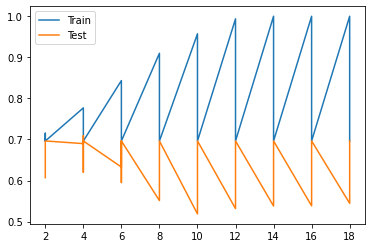

In [19]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_depth'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_depth'], result_grid['mean_test_score'], label="Test")
plt.legend()

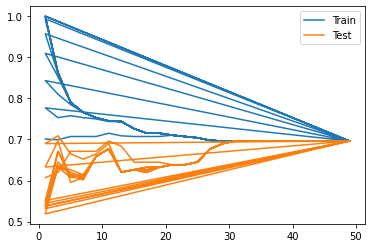

In [20]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

# 3. Random Search

In [21]:
from sklearn.model_selection import RandomizedSearchCV

In [22]:
from scipy.stats import randint

In [23]:
param_distribs = {'max_depth': randint(low=1, high=20), 
                  'min_samples_leaf': randint(low=1, high=50)}

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
random_search=RandomizedSearchCV(DecisionTreeClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)

In [26]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f42d2c0bf10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f42d278df50>},
                   return_train_score=True)

In [27]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'max_depth': 12, 'min_samples_leaf': 48}


In [28]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.696


In [29]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.755


In [30]:
result_random = random_search.cv_results_

In [31]:
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004689,0.001778,0.001906,0.000045,12,48,"{'max_depth': 12, 'min_samples_leaf': 48}",0.68750,0.68750,0.68750,0.709677,0.709677,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
1,0.003970,0.000101,0.001899,0.000045,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.65625,0.68750,0.68750,0.645161,0.516129,0.638508,0.063460,7,0.706349,0.698413,0.706349,0.708661,0.732283,0.710411,0.011475
2,0.003829,0.000126,0.001878,0.000044,3,46,"{'max_depth': 3, 'min_samples_leaf': 46}",0.68750,0.68750,0.68750,0.709677,0.709677,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
3,0.003860,0.000032,0.001890,0.000038,5,4,"{'max_depth': 5, 'min_samples_leaf': 4}",0.62500,0.56250,0.68750,0.645161,0.483871,0.600806,0.071007,10,0.785714,0.777778,0.761905,0.779528,0.763780,0.773741,0.009300
4,0.004880,0.001203,0.002080,0.000294,5,13,"{'max_depth': 5, 'min_samples_leaf': 13}",0.65625,0.68750,0.53125,0.709677,0.516129,0.620161,0.080719,9,0.746032,0.730159,0.753968,0.740157,0.748031,0.743670,0.008069
5,0.003820,0.000097,0.001884,0.000058,3,33,"{'max_depth': 3, 'min_samples_leaf': 33}",0.68750,0.68750,0.68750,0.709677,0.709677,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
6,0.003843,0.000089,0.001844,0.000012,10,10,"{'max_depth': 10, 'min_samples_leaf': 10}",0.68750,0.75000,0.56250,0.709677,0.645161,0.670968,0.063952,6,0.753968,0.738095,0.746032,0.732283,0.755906,0.745257,0.009050
7,0.003828,0.000204,0.001849,0.000034,14,46,"{'max_depth': 14, 'min_samples_leaf': 46}",0.68750,0.68750,0.68750,0.709677,0.709677,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
8,0.003784,0.000028,0.001864,0.000041,14,40,"{'max_depth': 14, 'min_samples_leaf': 40}",0.68750,0.68750,0.68750,0.709677,0.709677,0.696371,0.010865,1,0.698413,0.698413,0.698413,0.692913,0.692913,0.696213,0.002694
9,0.004832,0.000866,0.002294,0.000443,9,3,"{'max_depth': 9, 'min_samples_leaf': 3}",0.56250,0.59375,0.78125,0.677419,0.516129,0.626210,0.093691,8,0.857143,0.841270,0.841270,0.897638,0.858268,0.859118,0.020618


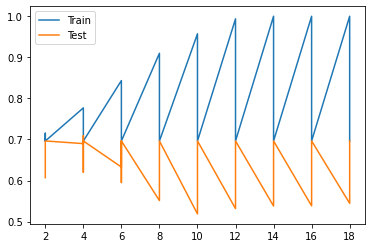

In [32]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_depth'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_depth'], result_grid['mean_test_score'], label="Test")
plt.legend()

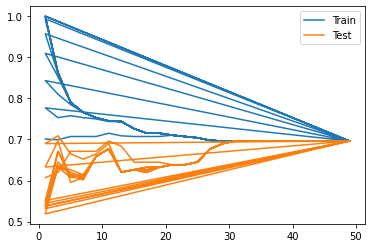

In [33]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
tree=DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)

In [36]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)

In [37]:
!pip install graphviz

In [38]:
# graphvis 설치가 제대로 되지 않을 경우 아래에서 직접 설치
# https://graphviz.gitlab.io/_pages/Download/windows/graphviz-2.38.msi

In [39]:
import graphviz

In [40]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [41]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["non-voting", "voting"],
                feature_names=X.columns, impurity=False, filled=True)

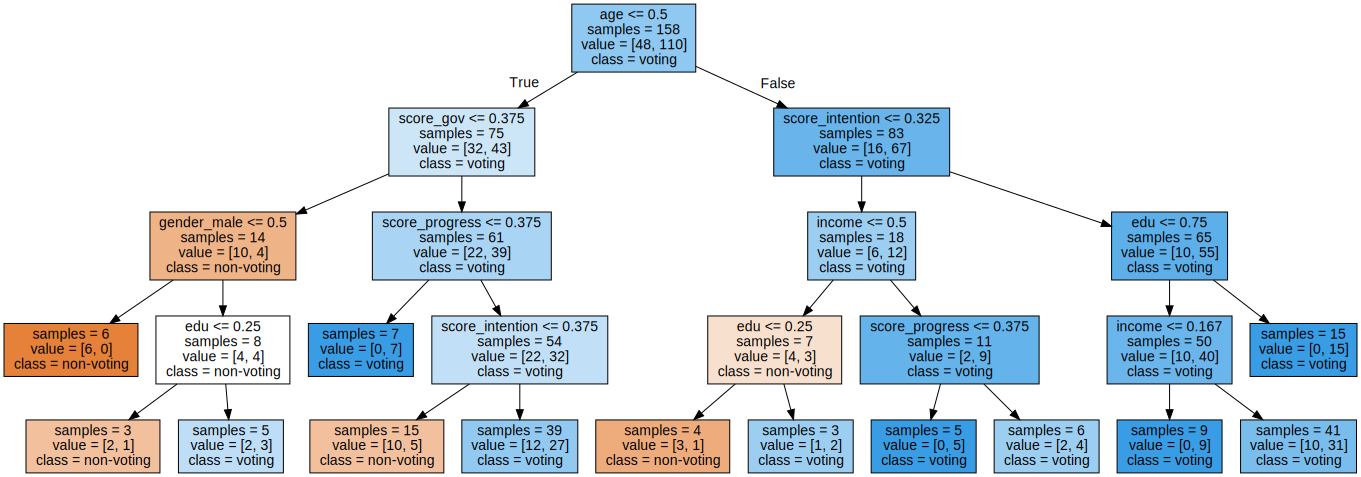

In [42]:
with open("tree.dot", encoding ="euc-kr") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [43]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.08929452 0.         0.         0.         0.
 0.         0.09297696 0.11338358 0.22454216 0.14834275 0.13871857
 0.19274146]


In [44]:
import matplotlib.pyplot as plt
import numpy as np

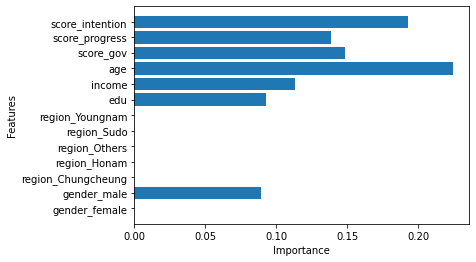

In [45]:
def plot_feature_importances_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_tree(tree)

# 4. 모델평가

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
tree=DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)

In [48]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
pred_train=tree.predict(X_train)

In [51]:
confusion_train=confusion_matrix(y_train, pred_train)

In [52]:
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[ 21  27]
 [  7 103]]


In [53]:
pred_test=tree.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[ 5  8]
 [ 4 36]]


In [54]:
from sklearn.metrics import f1_score

In [55]:
f1=f1_score(y_test, pred_test)

In [56]:
print("f1 score:\n", f1)

f1 score:
 0.8571428571428572


In [57]:
from sklearn.metrics import classification_report

In [58]:
cfreport=classification_report(y_test, pred_test)

In [59]:
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           0       0.56      0.38      0.45        13
           1       0.82      0.90      0.86        40

    accuracy                           0.77        53
   macro avg       0.69      0.64      0.66        53
weighted avg       0.75      0.77      0.76        53



# 5. 다중분류 적용: 원 데이터 적용

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
import pandas as pd

In [62]:
data=pd.read_csv('/content/drive/MyDrive/G_ML_2/data/vote.csv', encoding='utf-8')

In [63]:
data.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,1,4,3,3,3,2,2,4.0,1,2
1,1,5,2,3,3,2,4,3.0,0,3
2,1,3,1,2,4,1,3,2.8,1,4
3,2,1,2,1,3,5,4,2.6,1,1
4,1,1,1,2,4,4,3,2.4,1,1


In [64]:
X=data[['gender', 'region', 'edu', 'income', 'age', 
        'score_gov', 'score_progress', 'score_intention']]

In [65]:
y=data[['parties']]

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=42 )

In [68]:
from sklearn.model_selection import RandomizedSearchCV

In [69]:
from scipy.stats import randint

In [70]:
param_distribs = {'max_depth': randint(low=1, high=20), 
                  'min_samples_leaf': randint(low=1, high=50)}

In [71]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
random_search=RandomizedSearchCV(DecisionTreeClassifier(), 
                                 param_distributions=param_distribs, cv=5, return_train_score=True)

In [73]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f42d1b4b8d0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f42d2cbe090>},
                   return_train_score=True)

In [74]:
print("Best Parameter: {}".format(random_search.best_params_))

Best Parameter: {'max_depth': 13, 'min_samples_leaf': 30}


In [75]:
print("Best Cross-validity Score: {:.3f}".format(random_search.best_score_))

Best Cross-validity Score: 0.501


In [76]:
print("Test set Score: {:.3f}".format(random_search.score(X_test, y_test)))

Test set Score: 0.585


In [77]:
result_random = random_search.cv_results_

In [78]:
pd.DataFrame(result_random)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004096,0.000350,0.001868,0.000055,13,30,"{'max_depth': 13, 'min_samples_leaf': 30}",0.43750,0.50000,0.46875,0.612903,0.483871,0.500605,0.059813,1,0.595238,0.539683,0.587302,0.511811,0.496063,0.546019,0.039580
1,0.004280,0.000398,0.002206,0.000503,16,13,"{'max_depth': 16, 'min_samples_leaf': 13}",0.43750,0.40625,0.43750,0.548387,0.451613,0.456250,0.048402,6,0.603175,0.595238,0.595238,0.527559,0.551181,0.574478,0.029764
2,0.004271,0.000461,0.002117,0.000351,19,49,"{'max_depth': 19, 'min_samples_leaf': 49}",0.40625,0.37500,0.40625,0.354839,0.419355,0.392339,0.023765,9,0.412698,0.412698,0.412698,0.417323,0.409449,0.412973,0.002513
3,0.004661,0.000653,0.002139,0.000238,5,12,"{'max_depth': 5, 'min_samples_leaf': 12}",0.43750,0.40625,0.43750,0.516129,0.451613,0.449798,0.036337,8,0.603175,0.595238,0.595238,0.566929,0.551181,0.582352,0.019875
4,0.004356,0.000566,0.002471,0.001032,7,42,"{'max_depth': 7, 'min_samples_leaf': 42}",0.40625,0.37500,0.40625,0.354839,0.419355,0.392339,0.023765,9,0.412698,0.412698,0.412698,0.417323,0.409449,0.412973,0.002513
5,0.004670,0.000561,0.002286,0.000456,8,35,"{'max_depth': 8, 'min_samples_leaf': 35}",0.34375,0.50000,0.43750,0.516129,0.483871,0.456250,0.062081,6,0.500000,0.460317,0.476190,0.456693,0.496063,0.477853,0.017777
6,0.003904,0.000205,0.002008,0.000237,4,17,"{'max_depth': 4, 'min_samples_leaf': 17}",0.43750,0.34375,0.46875,0.548387,0.548387,0.469355,0.076530,3,0.595238,0.563492,0.587302,0.527559,0.527559,0.560230,0.028649
7,0.003740,0.000035,0.001797,0.000019,17,25,"{'max_depth': 17, 'min_samples_leaf': 25}",0.43750,0.34375,0.46875,0.612903,0.483871,0.469355,0.086728,3,0.595238,0.539683,0.587302,0.511811,0.496063,0.546019,0.039580
8,0.003786,0.000137,0.001899,0.000175,14,23,"{'max_depth': 14, 'min_samples_leaf': 23}",0.43750,0.34375,0.46875,0.612903,0.483871,0.469355,0.086728,3,0.595238,0.539683,0.587302,0.511811,0.496063,0.546019,0.039580
9,0.003706,0.000047,0.001786,0.000022,3,31,"{'max_depth': 3, 'min_samples_leaf': 31}",0.43750,0.50000,0.46875,0.580645,0.483871,0.494153,0.047908,2,0.595238,0.539683,0.587302,0.464567,0.496063,0.536570,0.050696


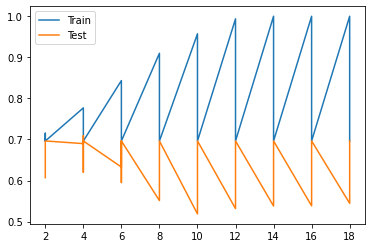

In [79]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_max_depth'], result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_max_depth'], result_grid['mean_test_score'], label="Test")
plt.legend()

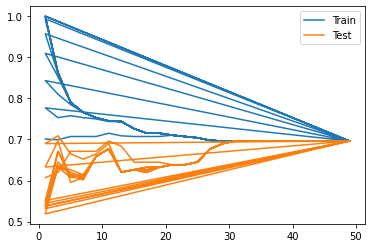

In [80]:
import matplotlib.pyplot as plt
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_train_score'], label="Train")
plt.plot(result_grid['param_min_samples_leaf'], 
         result_grid['mean_test_score'], label="Test")
plt.legend()

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
tree=DecisionTreeClassifier(max_depth=10, min_samples_leaf=27)

In [83]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=27)

In [84]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree_party.dot", class_names=["A", "B", "C", "D"],
                feature_names=X.columns, impurity=False, filled=True)

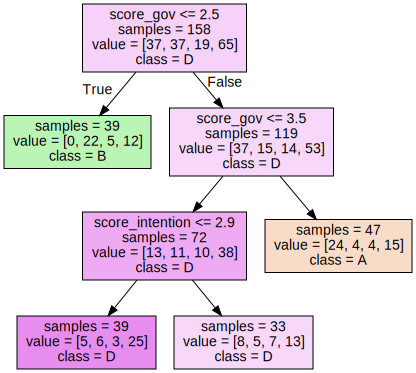

In [85]:
with open("tree_party.dot", encoding ="euc-kr") as f:
    dot_graph = f.read()
    display(graphviz.Source(dot_graph))

In [86]:
print("특성 중요도:\n{}".format(tree.feature_importances_))

특성 중요도:
[0.         0.         0.         0.         0.         0.89161792
 0.         0.10838208]


In [87]:
import matplotlib.pyplot as plt
import numpy as np

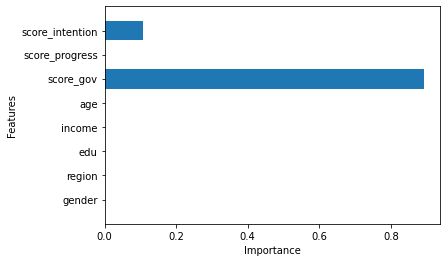

In [88]:
def plot_feature_importances_tree(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

plot_feature_importances_tree(tree)

In [89]:
from sklearn.metrics import confusion_matrix
pred_train=tree.predict(X_train)
confusion_train=confusion_matrix(y_train, pred_train)
print("훈련데이터 오차행렬:\n", confusion_train)

훈련데이터 오차행렬:
 [[24  0  0 13]
 [ 4 22  0 11]
 [ 4  5  0 10]
 [15 12  0 38]]


In [90]:
pred_test=tree.predict(X_test)
confusion_test=confusion_matrix(y_test, pred_test)
print("테스트 데이터 오차행렬:\n", confusion_test)

테스트 데이터 오차행렬:
 [[ 8  1  0  4]
 [ 0 10  0  6]
 [ 3  0  0  3]
 [ 3  2  0 13]]


In [91]:
from sklearn.metrics import f1_score
f1=f1_score(y_test, pred_test, average="micro" )
f2=f1_score(y_test, pred_test, average="macro" )

In [92]:
print("micro f1 score:\n", f1)
print("macro f1 score:\n", f2)

micro f1 score:
 0.5849056603773585
macro f1 score:
 0.46828921397886913


In [93]:
from sklearn.metrics import classification_report
cfreport=classification_report(y_test, pred_test)
print("분류예측 레포트:\n", cfreport)

분류예측 레포트:
               precision    recall  f1-score   support

           1       0.57      0.62      0.59        13
           2       0.77      0.62      0.69        16
           3       0.00      0.00      0.00         6
           4       0.50      0.72      0.59        18

    accuracy                           0.58        53
   macro avg       0.46      0.49      0.47        53
weighted avg       0.54      0.58      0.55        53

